In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
G=0.003957
B=0.042147
r=0.685134
x=2.124639
f=50
p=2
ns=60*f/p
V1=200/np.sqrt(3)
s=np.linspace(0.0001, 1, 1000)
Z2=(r+r/s)**2+x**2
I1=V1/np.sqrt((r+r/s)**2+x**2)
T=3*r*V1**2/(2*np.pi*f/p*s*((r+r/s)**2+x**2))
Pin=3*(G+(r+r/s)/Z2)*V1**2
Pout=3*r*(1-s)/s*I1**2
cos=(G+(r+r/s)/Z2)/np.sqrt((G+(r+r/s)/Z2)**2+(B+x/Z2)**2)

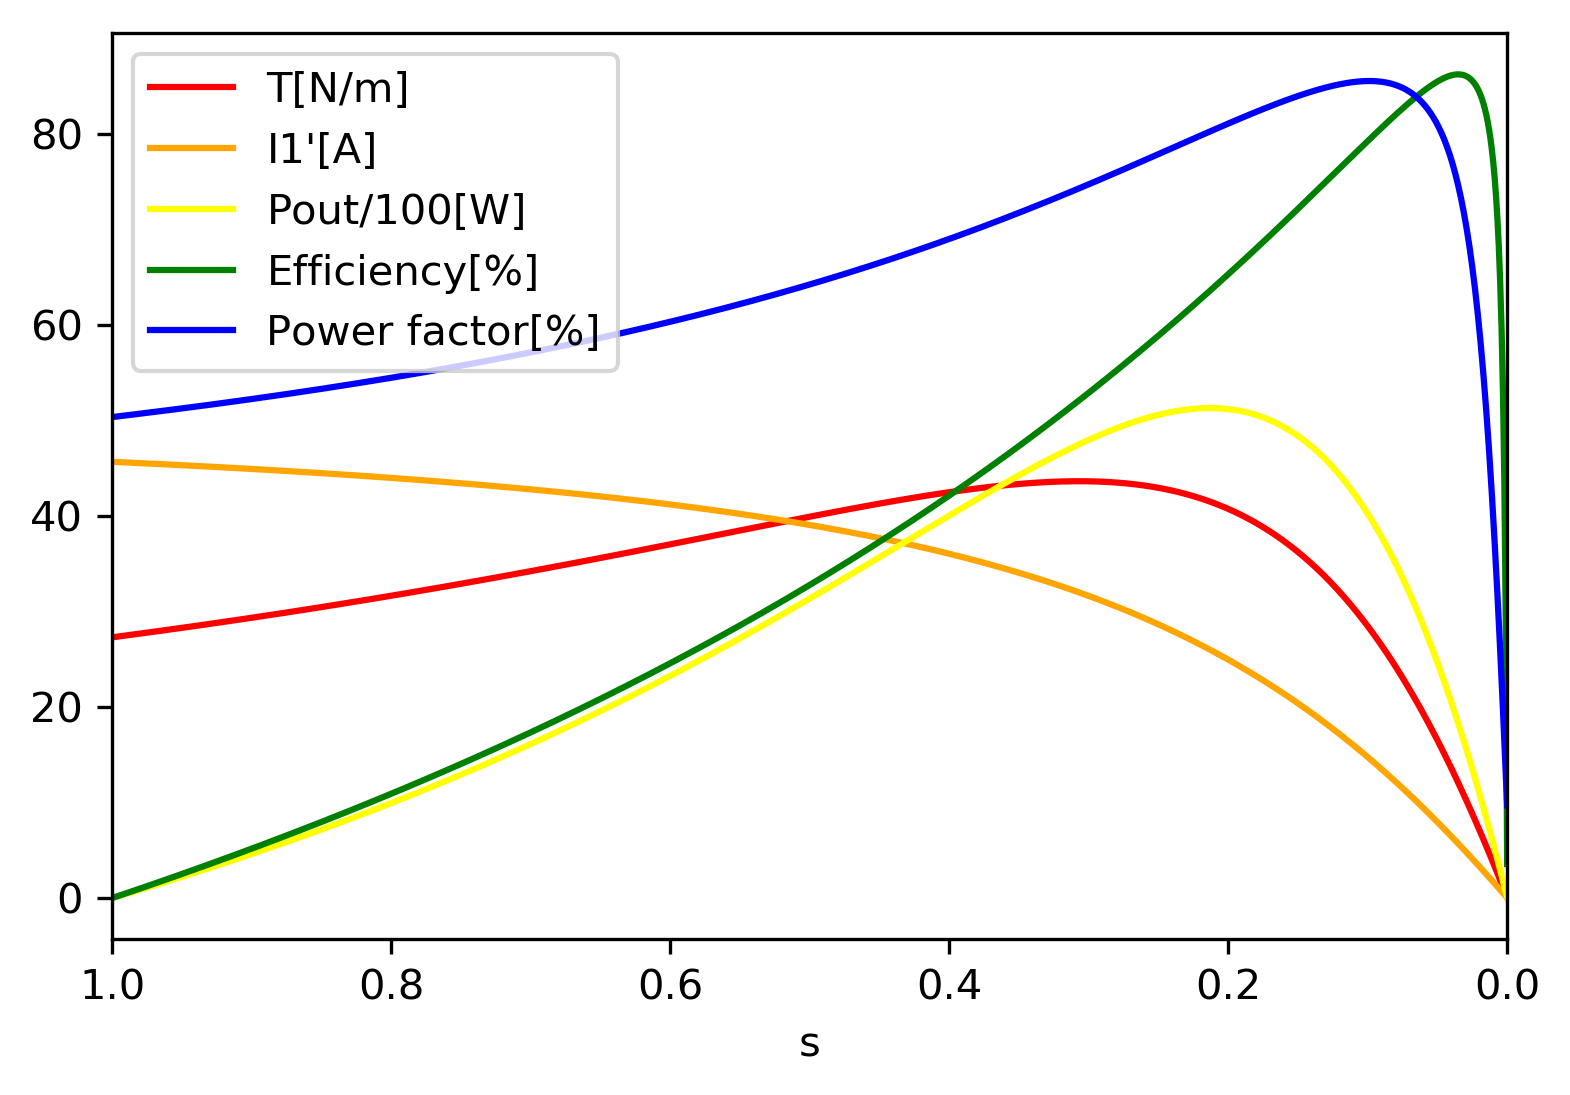

In [147]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.set_xlabel('s')  # x軸ラベル
#ax.set_ylabel('P[C m−2]')  # y軸ラベル
ax.set_xlim([1, 0]) # x方向の描画範囲を指定
#ax.set_ylim([-3, 3])    # y方向の描画範囲を指定
ax.plot(s, T, color='red', label='T[N/m]')
ax.plot(s, I1, color='orange', label="I1'[A]")
ax.plot(s, Pout/100, color='yellow', label="Pout/100[W]")
ax.plot(s, Pout*100/Pin, color='green', label="Efficiency[%]")
ax.plot(s, cos*100, color='blue', label="Power factor[%]")
ax.legend(loc=2)    # 凡例
#fig.tight_layout()  # レイアウトの設定
plt.savefig('s.png') # 画像の保存
#plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
fig.align_labels()
#ax.yaxis.set_label_coords(0.45, 1)
#ax.xaxis.set_label_coords(1,0.45)
plt.show()

In [137]:
s=np.linspace(0.0001, 0.2, 1000)
Z2=(r+r/s)**2+x**2
I1=V1/np.sqrt((r+r/s)**2+x**2)
T=3*r*V1**2/(2*np.pi*f/p*s*((r+r/s)**2+x**2))
Pin=3*(G+(r+r/s)/Z2)*V1**2
Pout=3*r*(1-s)/s*I1**2
cos=(G+(r+r/s)/Z2)/np.sqrt((G+(r+r/s)/Z2)**2+(B+x/Z2)**2)

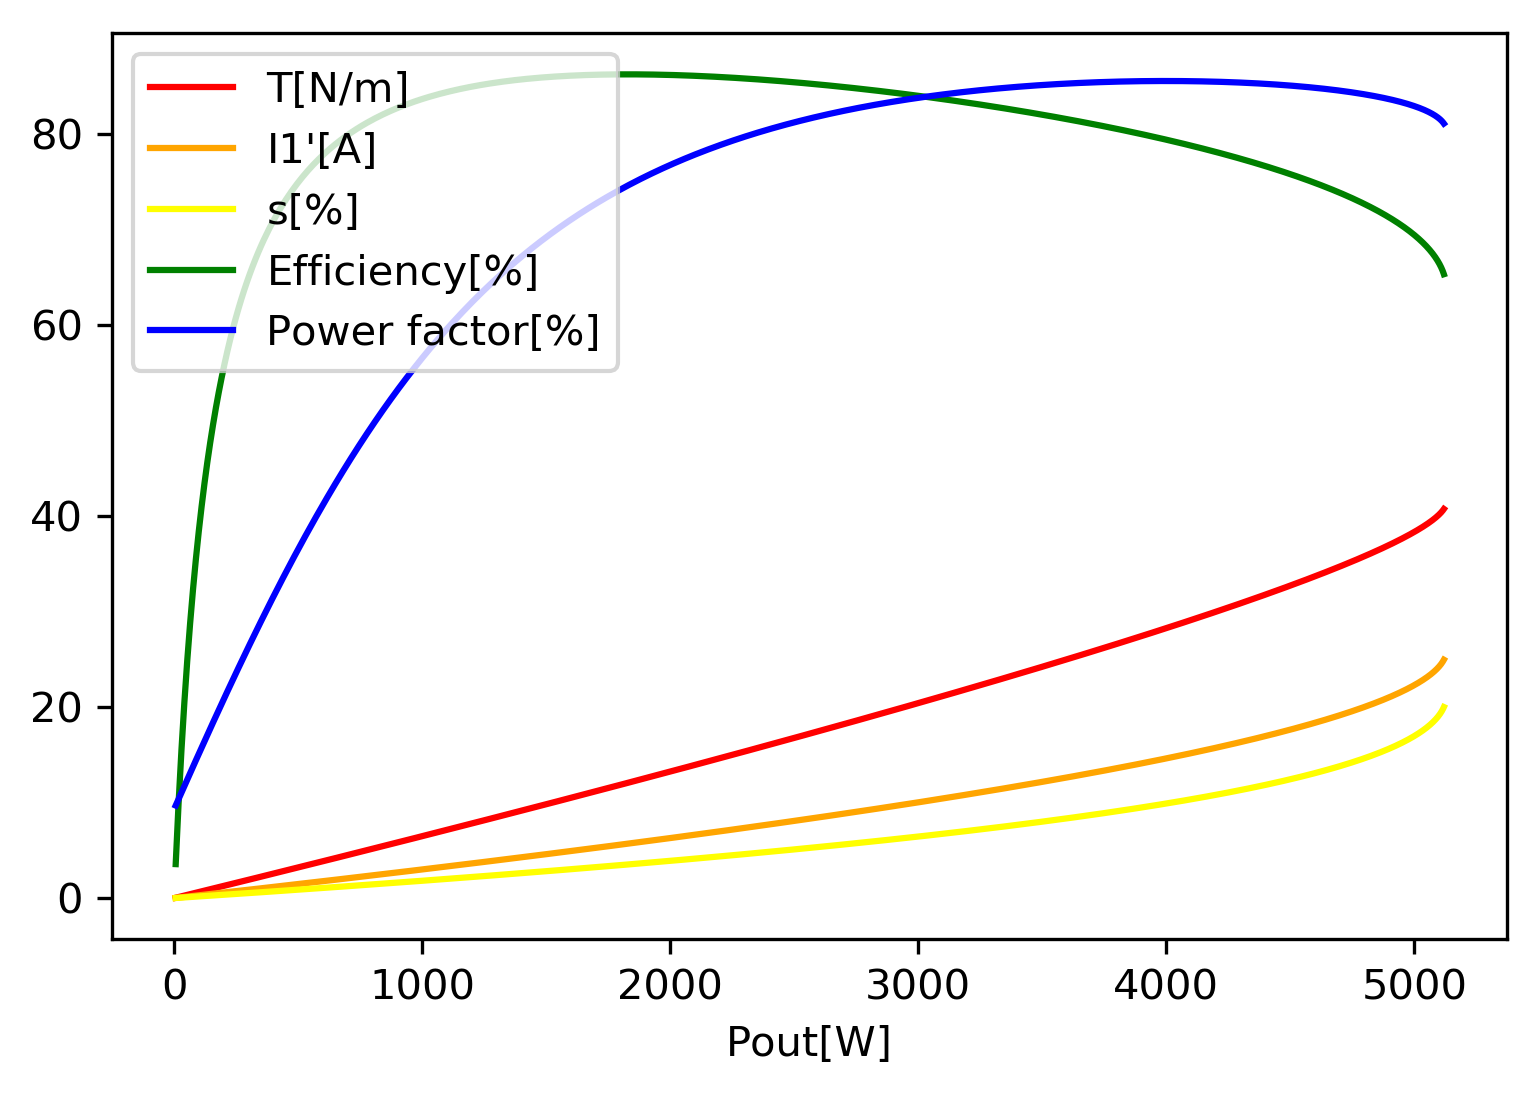

In [138]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.set_xlabel('Pout[W]')  # x軸ラベル

ax.plot(Pout,T, color='red', label='T[N/m]')
ax.plot(Pout, I1, color='orange', label="I1'[A]")
ax.plot(Pout,s*100, color='yellow', label="s[%]")
ax.plot(Pout,Pout*100/Pin, color='green', label="Efficiency[%]")
ax.plot(Pout, cos*100, color='blue', label="Power factor[%]")
ax.legend(loc=2)    # 凡例
#fig.tight_layout()  # レイアウトの設定
plt.savefig('out.png') # 画像の保存

fig.align_labels()

plt.show()

In [139]:
filename = 'DataTotal.csv' #データファイル名
df = pd.read_table(filename, sep='\t+|,', engine='python', skiprows=2)

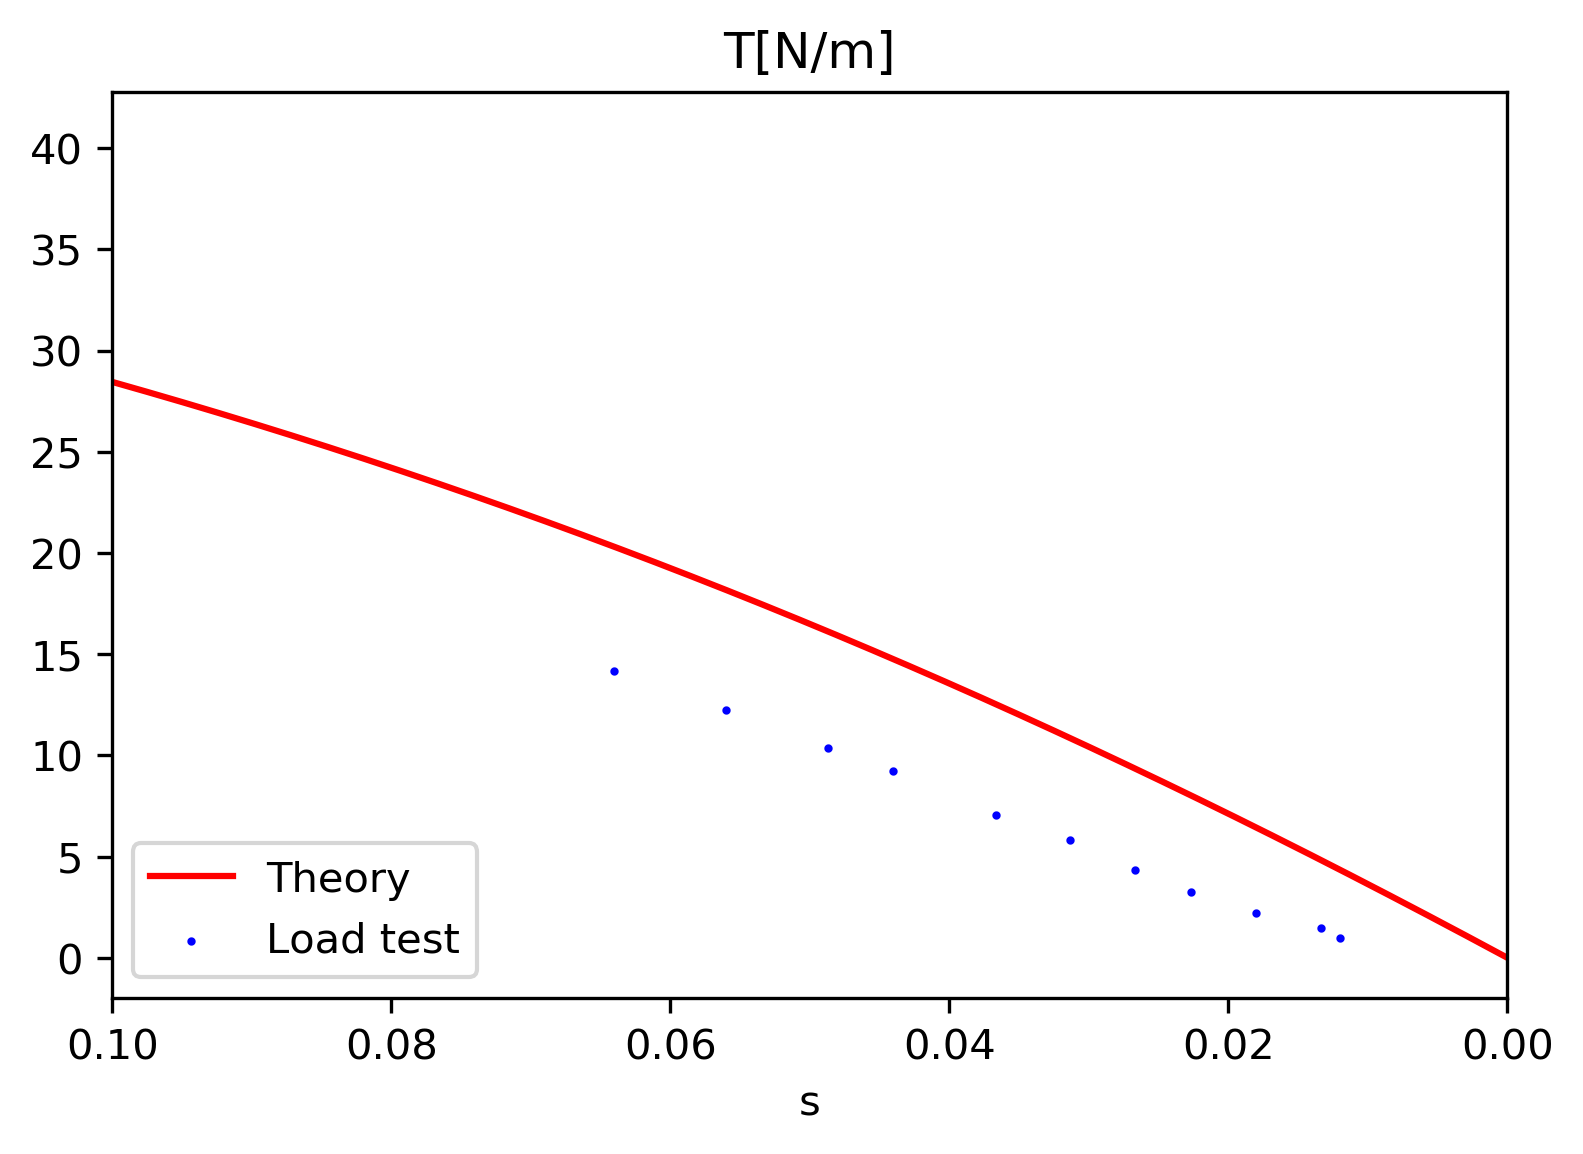

In [140]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.set_xlim([0.1, 0])
ax.set_xlabel('s')
ax.plot(s, T, color='red', label='Theory')
ax.scatter(df['s'], df['T1'], color='blue', label='Load test',s=1)
ax.legend(loc='lower left')

ax.set_title("T[N/m]")

fig.align_labels()
plt.savefig('T.png')

plt.show()

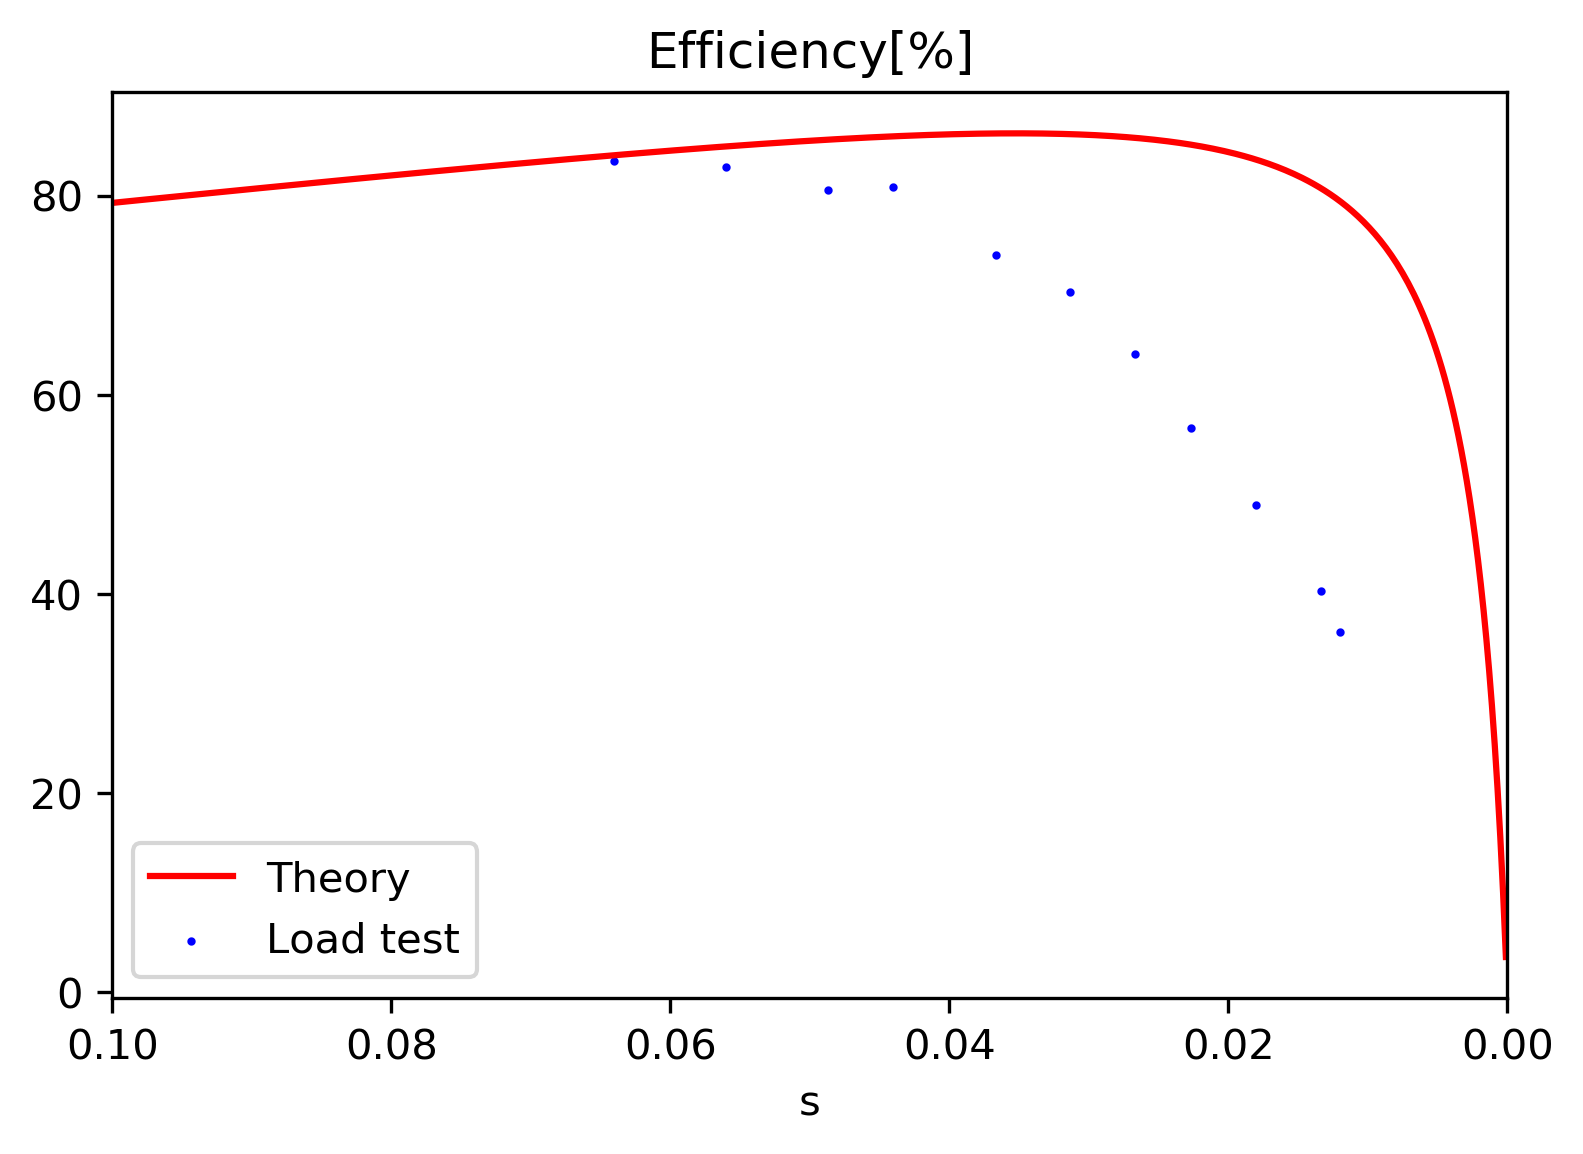

In [141]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.set_xlim([0.1, 0]) # x方向の描画範囲を指定
ax.set_xlabel('s')
ax.plot(s, Pout*100/Pin, color='red', label="Theory")
ax.scatter(df['s'], df['eff(%)'], color='blue', label="Load test",s=1)
ax.legend(loc='lower left')    # 凡例
ax.set_title("Efficiency[%]")

fig.align_labels()
plt.savefig('Eff.png')
plt.show()

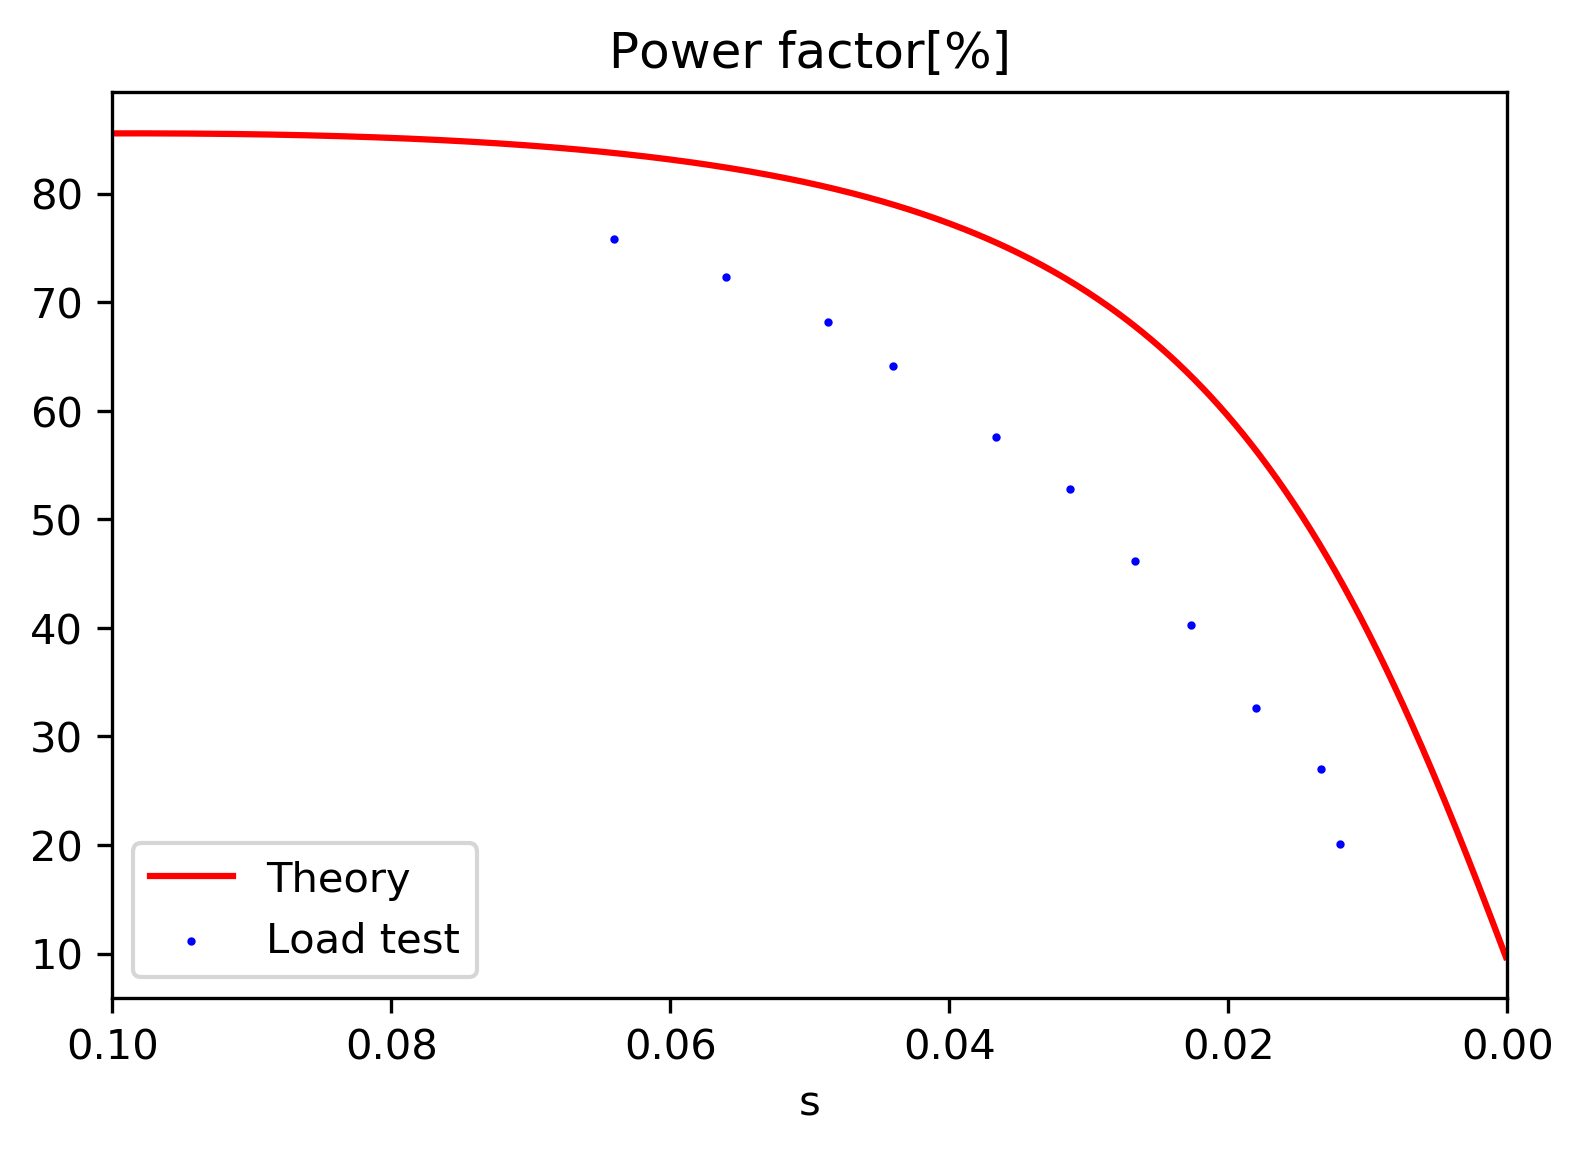

In [142]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

ax.set_xlim([0.1, 0]) # x方向の描画範囲を指定
ax.set_xlabel('s')
ax.plot(s, cos*100, color='red', label="Theory")
ax.scatter(df['s'], df['cos']*100, color='blue', label="Load test",s=1)

ax.set_title("Power factor[%]")
ax.legend(loc='lower left')    # 凡例

fig.align_labels()
plt.savefig('PF.png')
plt.show()

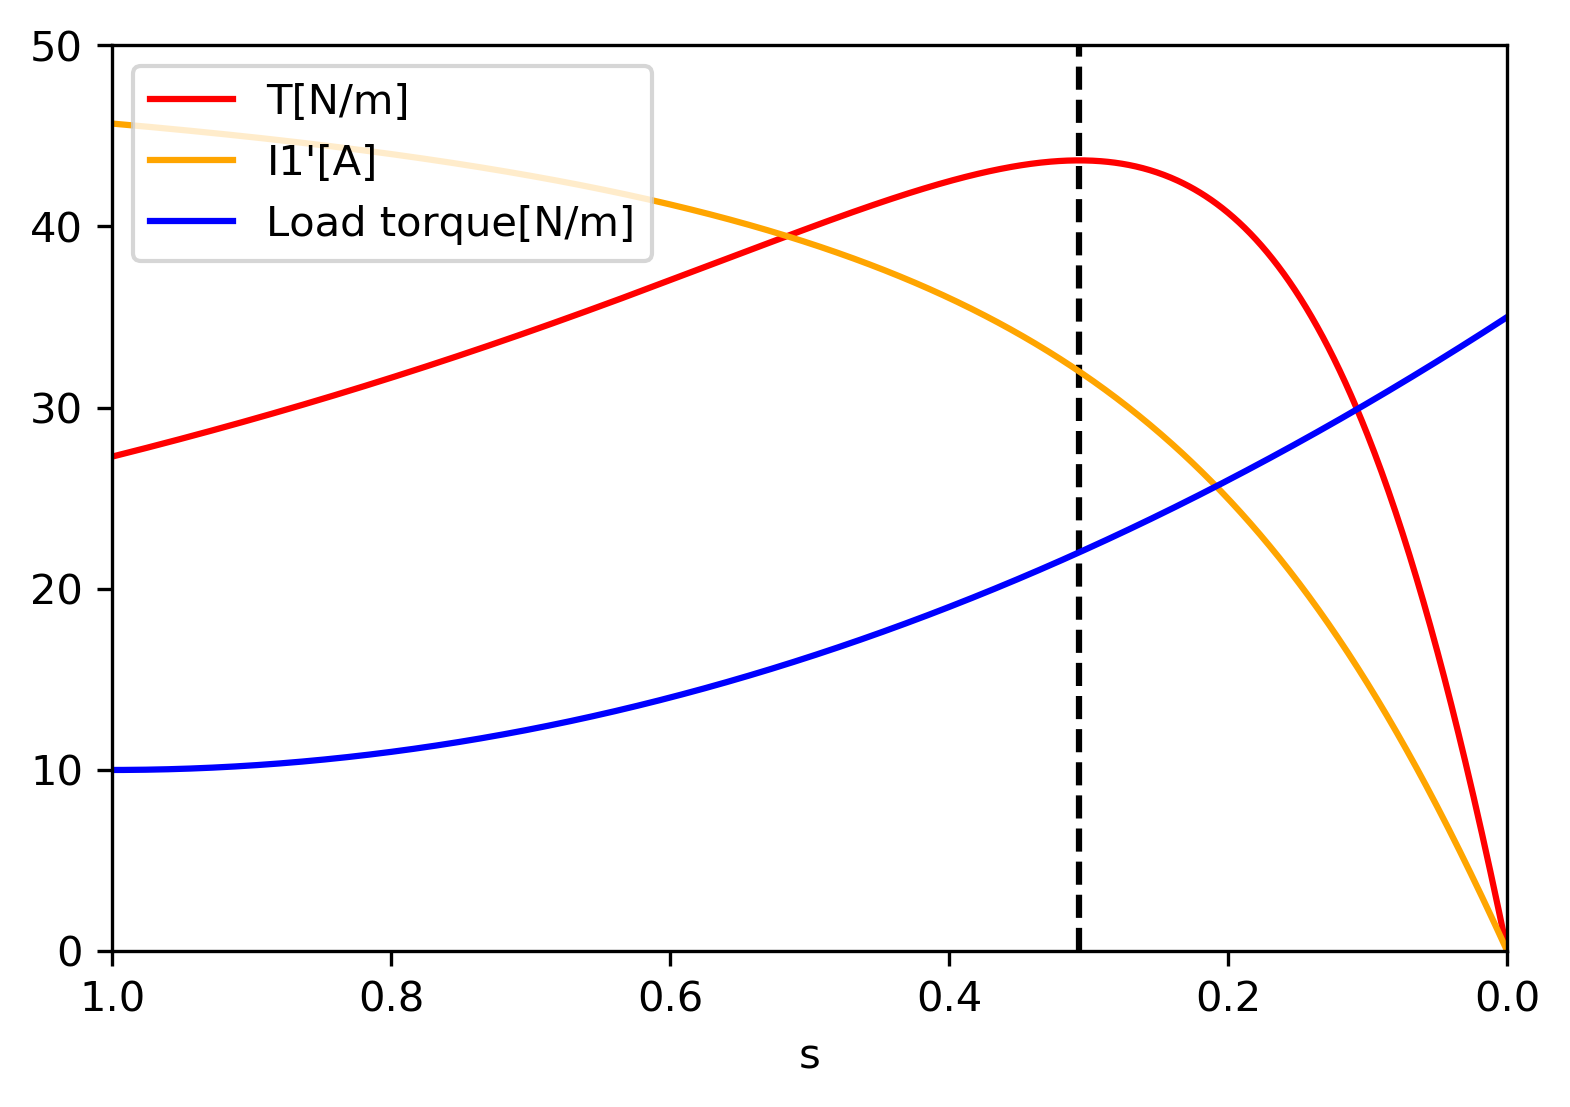

In [25]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.set_xlabel('s')  # x軸ラベル
y=25*(1-s)**2+10
#ax.set_ylabel('P[C m−2]')  # y軸ラベル
ax.set_xlim([1, 0]) # x方向の描画範囲を指定
ax.set_ylim([0, 50])    # y方向の描画範囲を指定
ax.plot(s, T, color='red', label='T[N/m]')
ax.plot(s, I1, color='orange', label="I1'[A]")
ax.plot(s, y, color='blue', label="Load torque[N/m]")

plt.vlines(s[np.where(T==max(T))[0]],0,50, "black", linestyles='dashed')

ax.legend(loc=2)    # 凡例
#fig.tight_layout()  # レイアウトの設定
plt.savefig('load torque.png') # 画像の保存
#plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
fig.align_labels()
#ax.yaxis.set_label_coords(0.45, 1)
#ax.xaxis.set_label_coords(1,0.45)
plt.show()